## Loading and Visualizing Data

In [1]:
import numpy as np
import scipy.optimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC

In [2]:
print("Loading and Visualizing Data ... \n")

data = loadmat('ex6data1.mat')

X = data['X']
y = data['y']

print(f'X : {X.shape}')
print(f'X : \n{X[:10,:]}\n')
print(f'y : {y.shape}')
print(f'y : \n{y[:10]}')


Loading and Visualizing Data ... 

X : (51, 2)
X : 
[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]
 [4.015  3.1937]
 [3.3814 3.4291]
 [3.9113 4.1761]
 [2.7822 4.0431]
 [2.5518 4.6162]]

y : (51, 1)
y : 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


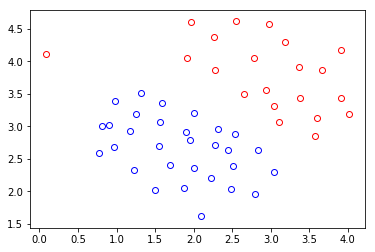

In [3]:
def plotData(X, y):

    pos = [i for i, _ in enumerate(y) if _ == 1]  # positive samples indices
    neg = [i for i, _ in enumerate(y) if _ == 0]  # negative samples indices
    
    plt.scatter(X[pos,0], X[pos,1], edgecolors='r', c='w')
    plt.scatter(X[neg,0], X[neg,1], edgecolors='b', c='w')

plotData(X, y)   

In [4]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)

    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

/home/shane/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


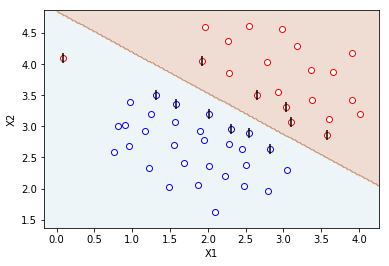

Number of support vectors:  12


In [5]:
clf = SVC(C=1.0, kernel='linear', tol=1e-3)
clf.fit(X, y)
plot_svc(clf, X, y)

## Implementing Gaussian Kernel

In [6]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

In [7]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print(f'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma =  : \n\t{sim}\n(for sigma = 2, this value should be about 0.324652)\n')

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma =  : 
	0.32465246735834974
(for sigma = 2, this value should be about 0.324652)



## Visualizing Dataset 2

In [8]:
print('Loading and visualizing Data ...\n')

data = loadmat('ex6data2.mat')


X = data['X']
y = data['y']

print(f'X : {X.shape}')
print(f'X : \n{X[:10,:]}\n')
print(f'y : {y.shape}')
print(f'y : \n{y[:10]}')

Loading and visualizing Data ...

X : (863, 2)
X : 
[[0.107143  0.60307  ]
 [0.093318  0.649854 ]
 [0.0979263 0.705409 ]
 [0.15553   0.784357 ]
 [0.210829  0.866228 ]
 [0.328341  0.929094 ]
 [0.429724  0.934942 ]
 [0.620968  0.934942 ]
 [0.756912  0.910088 ]
 [0.819124  0.879386 ]]

y : (863, 1)
y : 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


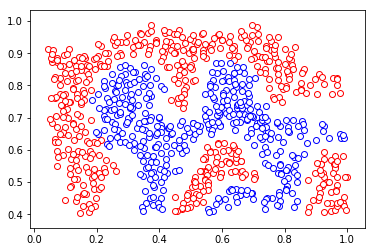

In [9]:
plotData(X, y)

## Training SVM with RBF Kernel (Dataset 2)

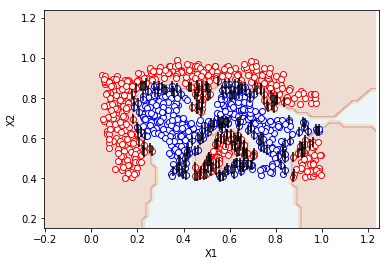

Number of support vectors:  266


In [10]:
clf = SVC(C=40, kernel='rbf', gamma=6)
clf.fit(X,y.ravel())
plot_svc(clf, X, y)

## Visualizing Dataset 3

In [11]:
print('Loading and visualizing Data ...\n')

data = loadmat('ex6data3.mat')


X = data['X']
y = data['y']

print(f'X : {X.shape}')
print(f'X : \n{X[:10,:]}\n')
print(f'y : {y.shape}')
print(f'y : \n{y[:10]}')

Loading and visualizing Data ...

X : (211, 2)
X : 
[[-0.158986   0.423977 ]
 [-0.347926   0.47076  ]
 [-0.504608   0.353801 ]
 [-0.596774   0.114035 ]
 [-0.518433  -0.172515 ]
 [-0.292627  -0.207602 ]
 [-0.158986  -0.0438596]
 [-0.0576037  0.143275 ]
 [-0.0714286  0.27193  ]
 [-0.297235   0.347953 ]]

y : (211, 1)
y : 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


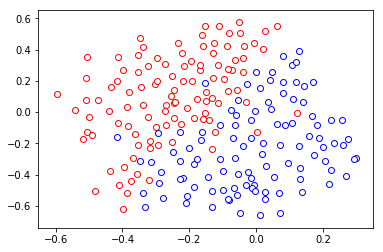

In [12]:
plotData(X, y)

## Training SVM with RBF Kernel (Dataset 3)

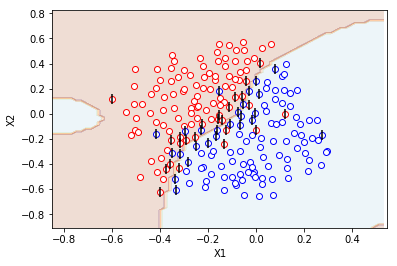

Number of support vectors:  49


In [13]:
clf = SVC(C=40, kernel='rbf', gamma=6)
clf.fit(X,y.ravel())
plot_svc(clf, X, y)